# Regression Assignment

**Name:** Allen Kurt Delos Santos 

**Course & Section:** BSCS-ML - COM221 

### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [ ]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [ ]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='object')

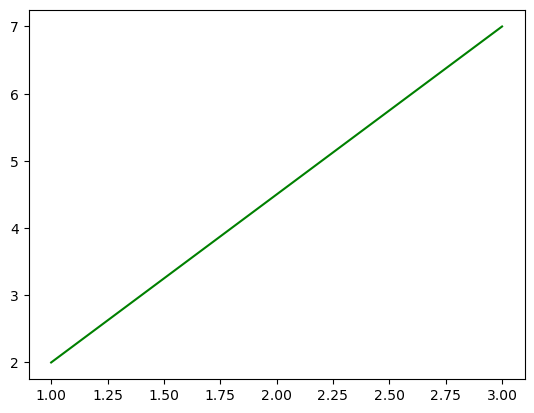

In [ ]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

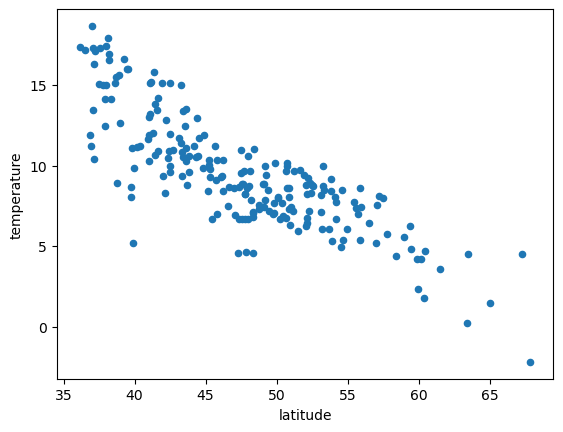

In [ ]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

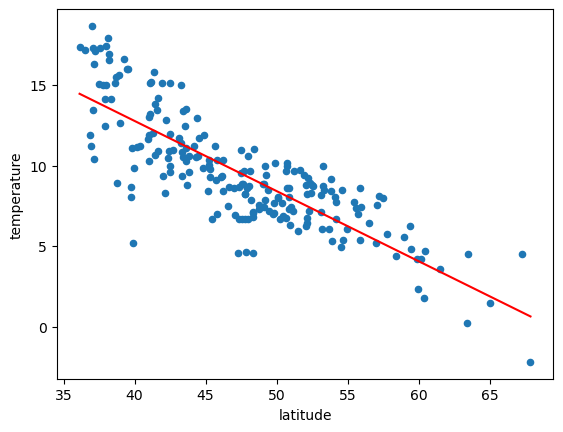

In [ ]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = mx + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267101
Correlation coefficient for temperature versus longitude: -0.1693075040361787


Training data:


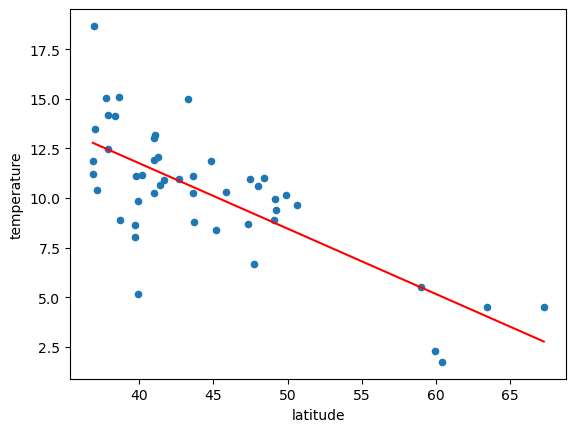

In [ ]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[ (cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
train.head()

,city,country,latitude,longitude,temperature
3,Adana,Turkey,36.99,35.32,18.67
6,Amiens,France,49.90,2.30,10.17
10,Angers,France,47.48,-0.53,10.98
11,Ankara,Turkey,39.93,32.86,9.86
12,Antalya,Turkey,36.89,30.70,11.88


In [ ]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit):  Adana


C:\Users\windows 11\AppData\Local\Temp\ipykernel_3904\1798674423.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
C:\Users\windows 11\AppData\Local\Temp\ipykernel_3904\1798674423.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Actual temperature:', float(city.temperature))


Predicted temperature: 12.750248828351419
Actual temperature: 18.67


Enter city name (or "quit" to quit):  quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [ ]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

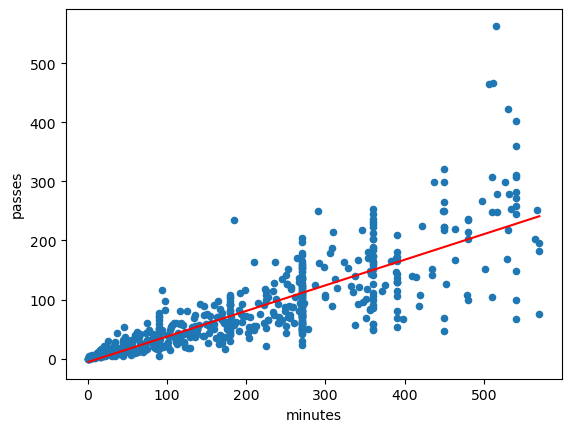

In [ ]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
players.plot.scatter('minutes', 'passes')

a, b = np.polyfit(players.minutes, players.passes, 1)

x1 = min(players.minutes)
x2 = max(players.minutes)

plt.plot([x1, x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
r_passes = np.corrcoef(players.minutes, players.passes)[1,0]
print('Correlation coefficient for passes versus minutes:', r_passes)

r_tackles = np.corrcoef(players.minutes, players.tackles)[1,0]
print('Correlation coefficient for tackles versus minutes:', r_tackles)

r_shots = np.corrcoef(players.minutes, players.shots)[1,0]
print('Correlation coefficient for shots versus minutes:', r_shots)

r_saves = np.corrcoef(players.minutes, players.saves)[1,0]
print('Correlation coefficient for saves versus minutes:', r_saves)

Correlation coefficient for passes versus minutes: 0.815119315795487
Correlation coefficient for tackles versus minutes: 0.6106734613835507
Correlation coefficient for shots versus minutes: 0.40792307740541656
Correlation coefficient for saves versus minutes: 0.22847723253088004


In [ ]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
positions = ['forward', 'midfielder', 'defender', 'goalkeeper']

for position in positions:
    position_players = players[players.position == position]
    
    print(f'\n{position.upper()}:')
    
    r_passes = np.corrcoef(position_players.minutes, position_players.passes)[1,0]
    print(f'  Passes vs minutes: {r_passes:.4f}')
    
    r_tackles = np.corrcoef(position_players.minutes, position_players.tackles)[1,0]
    print(f'  Tackles vs minutes: {r_tackles:.4f}')
    
    r_shots = np.corrcoef(position_players.minutes, position_players.shots)[1,0]
    print(f'  Shots vs minutes: {r_shots:.4f}')
    
    # Only goalkeepers make saves
    if position == 'goalkeeper':
        r_saves = np.corrcoef(position_players.minutes, position_players.saves)[1,0]
        print(f'  Saves vs minutes: {r_saves:.4f}')


FORWARD:
  Passes vs minutes: 0.8879
  Tackles vs minutes: 0.5747
  Shots vs minutes: 0.8482

MIDFIELDER:
  Passes vs minutes: 0.8654
  Tackles vs minutes: 0.7793
  Shots vs minutes: 0.5360

DEFENDER:
  Passes vs minutes: 0.8919
  Tackles vs minutes: 0.6960
  Shots vs minutes: 0.3624

GOALKEEPER:
  Passes vs minutes: 0.8017
  Tackles vs minutes: 0.2479
  Shots vs minutes: -0.1893
  Saves vs minutes: 0.6201


Training data:


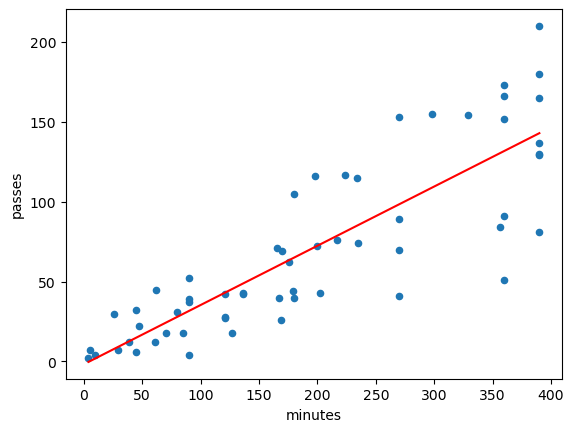

In [ ]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal
train = players[(players.team == 'Greece') | (players.team == 'USA') | (players.team == 'Portugal')]
a, b = np.polyfit(train.minutes, train.passes, 1)

print('Training data:')
train.plot.scatter('minutes', 'passes')
x1 = min(train.minutes)
x2 = max(train.minutes)
plt.plot([x1, x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [ ]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.

# Re-train the model to ensure we have the correct coefficients
train = players[(players.team == 'Greece') | (players.team == 'USA') | (players.team == 'Portugal')]
a, b = np.polyfit(train.minutes, train.passes, 1)

while True:
    surname = input('Enter player surname (or "quit" to quit): ')
    
    if surname == 'quit': 
        break
    
    player = players[players.surname == surname]
    
    if len(player) == 0:
        print('Player not in dataset')
    elif len(player) > 1:
        print(f'Multiple players with surname {surname} found. Please be more specific.')
    else:
        minutes = player.iloc[0].minutes
        actual_passes = player.iloc[0].passes
        predicted_passes = a * minutes + b
        
        print(f'Predicted passes: {predicted_passes:.2f}')
        print(f'Actual passes: {actual_passes}')

Enter player surname (or "quit" to quit):  Barry


Multiple players with surname Barry found. Please be more specific.


Enter player surname (or "quit" to quit):  Gomez


Multiple players with surname Gomez found. Please be more specific.


Enter player surname (or "quit" to quit):  Pepe


Multiple players with surname Pepe found. Please be more specific.


Enter player surname (or "quit" to quit):  Di Natale


Predicted passes: 54.99
Actual passes: 55


Enter player surname (or "quit" to quit):  Victor Obinna


Predicted passes: 24.95
Actual passes: 25


Enter player surname (or "quit" to quit):  Kim Yong-Jun


Predicted passes: 10.11
Actual passes: 10


Enter player surname (or "quit" to quit):  Honda


Predicted passes: 142.88
Actual passes: 143


Enter player surname (or "quit" to quit):  Kewell


Predicted passes: 7.15
Actual passes: 7


Enter player surname (or "quit" to quit):  quit


Multiple players with surname Gomez found. Please be more specific.


Enter player surname (or "quit" to quit):  Pepe


Multiple players with surname Pepe found. Please be more specific.


Enter player surname (or "quit" to quit):  Di Natale


Predicted passes: 4.92
Actual passes: 55


Enter player surname (or "quit" to quit):  Obinna


Player not in dataset


Enter player surname (or "quit" to quit):  Yong-Jun


Player not in dataset


Enter player surname (or "quit" to quit):  quit


In [ ]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string

# Train separate models for each position
train = players[(players.team == 'Greece') | (players.team == 'USA') | (players.team == 'Portugal')]

position_models = {}
for position in ['forward', 'midfielder', 'defender', 'goalkeeper']:
    train_pos = train[train.position == position]
    if len(train_pos) > 1:  # Need at least 2 points for regression
        a, b = np.polyfit(train_pos.minutes, train_pos.passes, 1)
        position_models[position] = (a, b)
print()

while True:
    surname = input('Enter player surname (or "quit" to quit): ')
    
    if surname == 'quit': 
        break
    
    player = players[players.surname == surname]
    
    if len(player) == 0:
        print('Player not in dataset')
    elif len(player) > 1:
        print(f'Multiple players with surname {surname} found. Please be more specific.')
    else:
        position = player.iloc[0].position
        minutes = player.iloc[0].minutes
        actual_passes = player.iloc[0].passes
        
        if position in position_models:
            a, b = position_models[position]
            predicted_passes = a * minutes + b
            print(f'Position: {position}')
            print(f'Predicted passes: {predicted_passes:.2f}')
            print(f'Actual passes: {actual_passes}')
        else:
            print(f'No trained model for position: {position}')

Enter player surname (or "quit" to quit):  Baptista


Position: midfielder
Predicted passes: 41.96
Actual passes: 42


Enter player surname (or "quit" to quit):  Frei


Position: forward
Predicted passes: 11.06
Actual passes: 11


Enter player surname (or "quit" to quit):  Zigic


Position: forward
Predicted passes: 64.88
Actual passes: 65


Enter player surname (or "quit" to quit):  Nkufo


Position: forward
Predicted passes: 64.88
Actual passes: 65


Enter player surname (or "quit" to quit):  Sapara


Position: midfielder
Predicted passes: 5.17
Actual passes: 5


Enter player surname (or "quit" to quit):  quit


Position: forward
Predicted passes: 3.19
Actual passes: 12
